# Hands On Machine Learning

In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('housing-Copy1.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
cat = [f for f in df.columns if df.dtypes[f] == 'object']
num.remove('median_house_value')
tar = df['median_house_value'] # Target. What we want to predict

# Preview
20640 rows with 10 variables. 8 numeric and 1 categorical. *median_house_value* is what we are trying to predict.
- Numeric: 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'
- Categorical: 'ocean_proximity'
- Target: 'median_house_value'

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Target

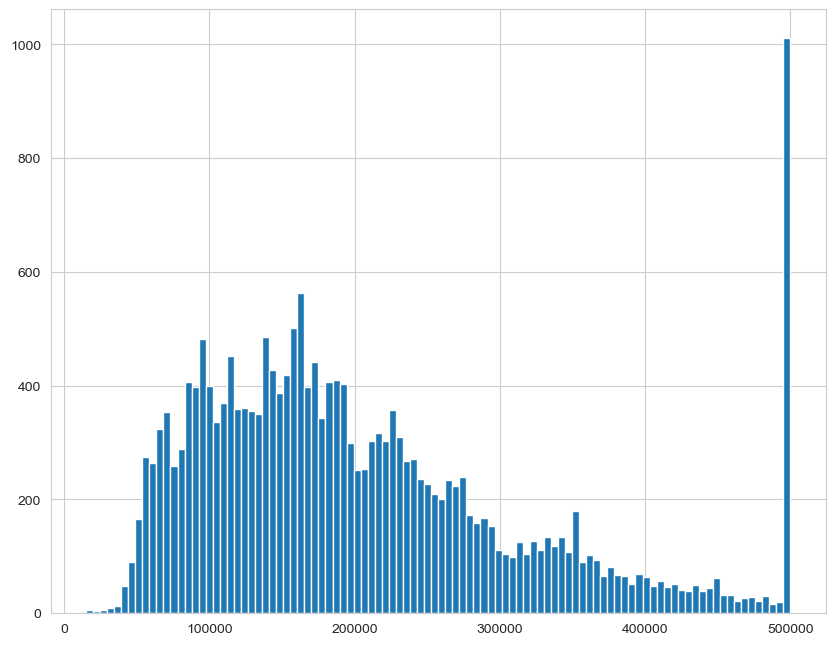

In [7]:
tar.hist(bins=100);

In [8]:
tar.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

The **median_house_value** is our target and there is a cap in the target at 500,000.

Only total_bedrooms has missing values. We will use median to replace missing values.

# Create A Test Set
When splitting data, check first if there are similar groups you want to stratify to get an even random split.

In [9]:
## Group median income according to 5 categories
df['income_cat'] = np.ceil(df['median_income'] / 1.5)
df['income_cat'].where(df['income_cat'] < 5, 5.0, inplace=True)
num = num + ['income_cat']

In [10]:
## Using Startified Split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    train = df.loc[train_index]
    test = df.loc[test_index]

In [11]:
df.income_cat.value_counts() / len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
train.income_cat.value_counts() / len(train)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [13]:
test.income_cat.value_counts() / len(test)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

The _Test Set_ generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the _Test Set_ generated using purely random sampling is quite skewed.

You now have the Train dataset. From this point forward, all cleaning you do must be only done on Train. Test should not be touched because of it lead to overfitting when we come to evaluation.

# Explore Data
Start with checking correlations of numeric variables with the target data. Then make explore the data with many graphs but only show the top 3 graphs. Pairplot, scatterplot and a wildcard graph. Use only the train data in exploring.

## Correlations

In [14]:
train.corr()['median_house_value'].sort_values(ascending=False).reset_index().style.bar()

,index,median_house_value
0,median_house_value,1.000000
1,median_income,0.687160
2,income_cat,0.642274
3,total_rooms,0.135097
4,housing_median_age,0.114110
5,households,0.064506
6,total_bedrooms,0.047689
7,population,-0.026920
8,longitude,-0.047432
9,latitude,-0.142724


In [15]:
train.corr().sort_values(by = 'median_house_value', ascending=False).reset_index().style.bar()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.642274
1,median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.902156
2,income_cat,-0.016243,-0.078848,-0.139385,0.221690,0.012502,0.022848,0.034995,0.902156,0.642274,1.000000
3,total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.221690
4,housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.139385
5,households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,0.034995
6,total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.012502
7,population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,0.022848
8,longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.016243
9,latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,-0.078848


## 3 Graphs

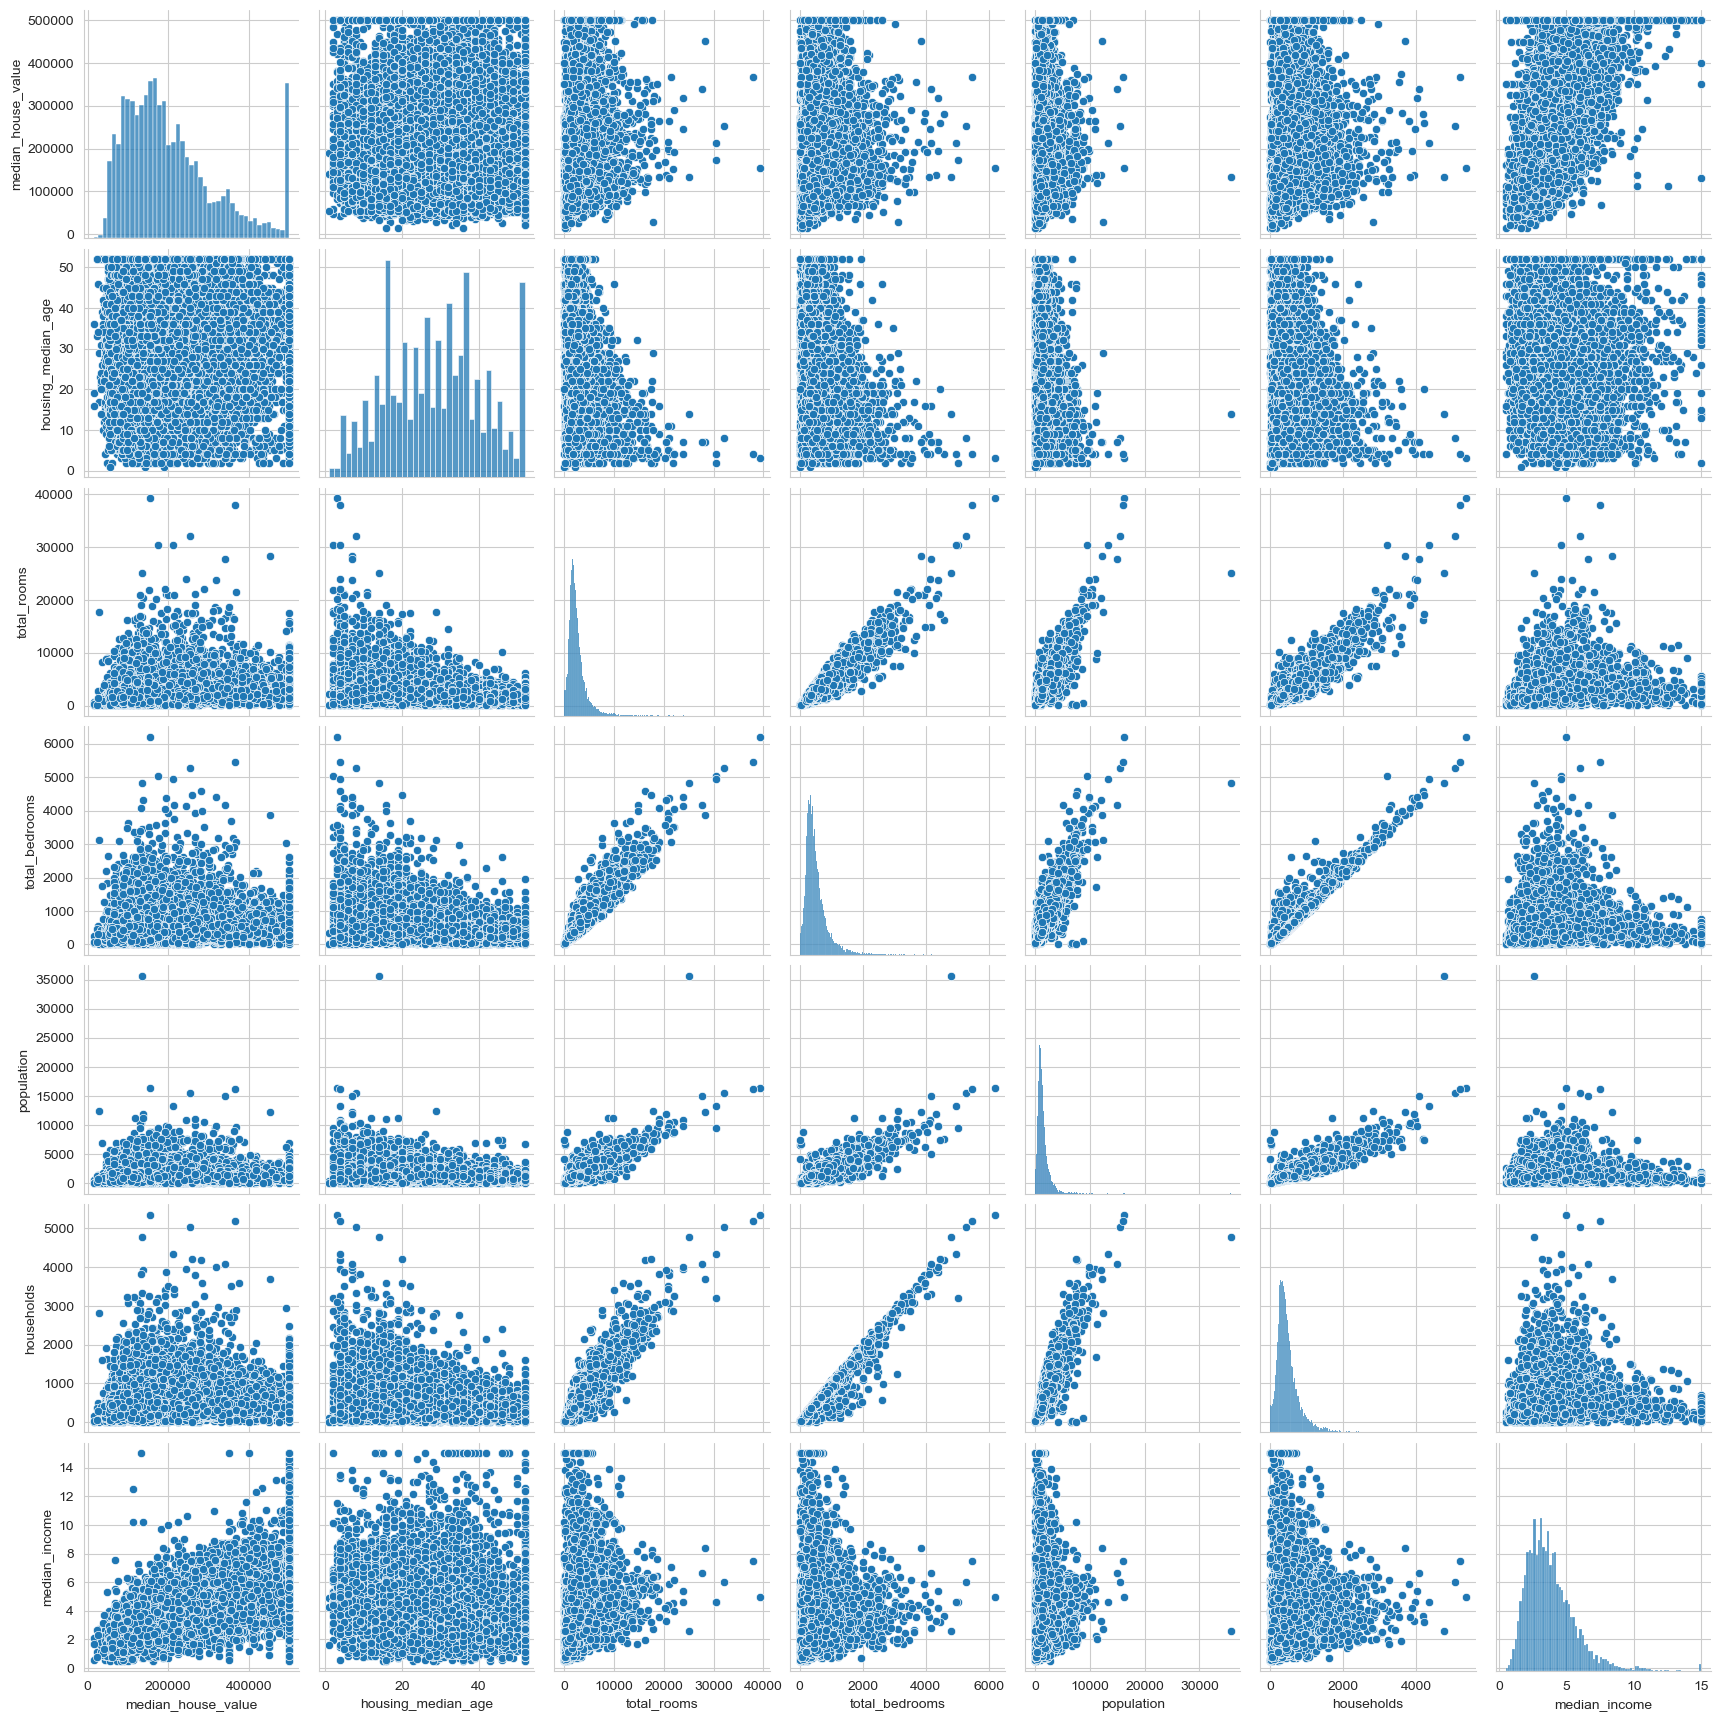

In [16]:
sns.pairplot(train[['median_house_value'] + num[2:-1]]);

Pairplot shows that there are features that correlates with other features. We can possibly combine them to have a much stronger feature that correlates with our target.

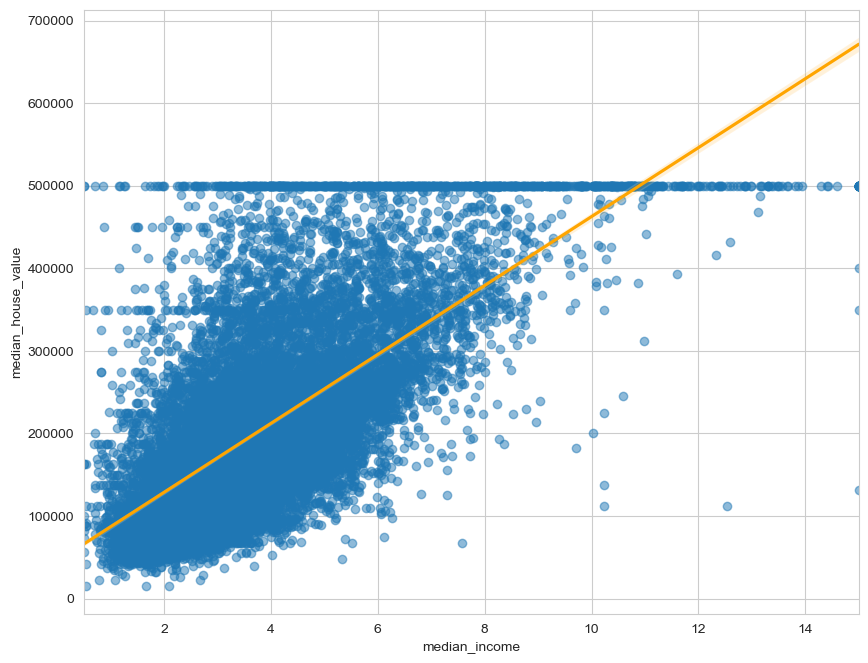

In [17]:
sns.regplot(x='median_income', y='median_house_value', data=train
            , scatter_kws={'alpha':0.5} , line_kws={"color": "orange"});

median income is the most correlated feature for our target. There are lines at 500k where we see the cap but there are also lines between 450k and 350k, which needs to be address before we fit our model.

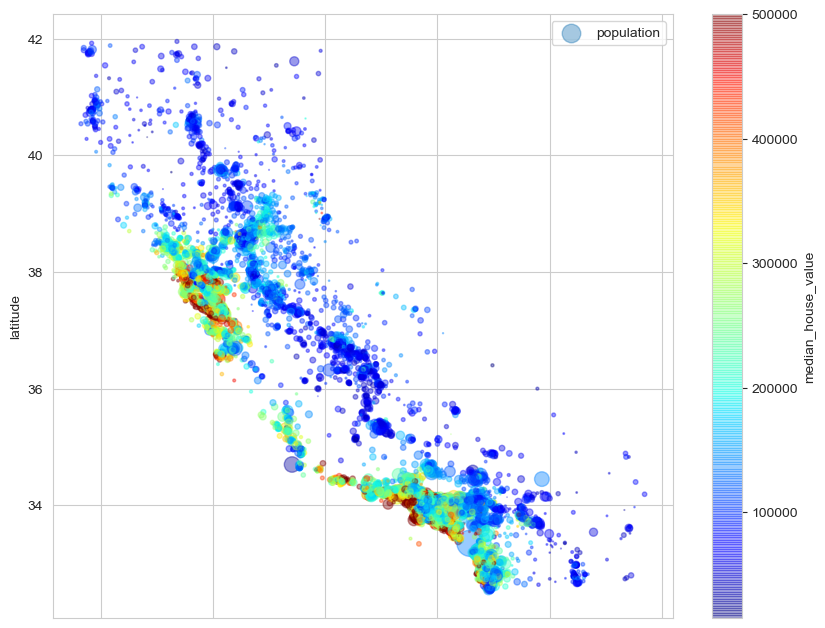

In [18]:
## Using Seaborn
# sns.relplot(x='longitude', y='latitude', data=train, hue='median_house_value'
#             , palette=plt.get_cmap('jet')
#             , size=train['population']/100, sizes=(50,500), alpha=0.3 );
## Using MatplotLib
train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=train['population']/100, label='population', c='median_house_value', 
             cmap=plt.get_cmap('jet'), colorbar=True);

Housing prices are very much related to the location and the population density. Clustering algorithm to detect main clusters and add new features that measure the proximity to the cluster centers.

# Data Cleaning
After doing an initial exploration, clean the data as a whole. Then, check the correlation again on the new features.

# Missing Data
Look at Missing data as a whole before splitting the data. If data is already split, combine train and test.

In [19]:
mis = train.isnull().sum()
mis = mis[mis>0]
pd.DataFrame({
    'count': mis,
    'proportion': mis / len(train)
}).sort_values(by='proportion', ascending=False).style.bar()

,count,proportion
total_bedrooms,158,0.009569


In [ ]:
# train.loc[train['total_bedrooms'].isnull(), 'total_bedrooms'] = train['total_bedrooms'].median()

# Feature Engineering

In [ ]:
# train['rooms_per_household'] = train['total_rooms'] / train['households']
# train['bedrooms_per_room'] = train['total_bedrooms'] / train['total_rooms']
# train['population_per_household'] = train['population'] / train['households']

In [20]:
# train.corrwith(train['median_house_value']).sort_values(ascending=False).reset_index().style.bar()

# Categorical Encoding
For categorical variables, just use get_dummies and merge to df.

In [21]:
# train = train.join(pd.get_dummies(train['ocean_proximity']))

# Custom Transformers

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) # initiate
housing_extra_attributes = attr_adder.transform(train.values) # transform

In [ ]:
housing_extra_attributes

# Feature Scaling
Total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15.


## MinMaxScaler Normalization
Transforms the numeric data between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # initiate
scaler.fit(train[num]) # fit
minmax = scaler.transform(train[num]) # transform
pd.DataFrame(minmax, columns=num)

## Standardization
Uses standard deviation with mean as zero.

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train[num])
pd.DataFrame(scaler.transform(train[num]), columns=num)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-1.156043,0.771950,0.743331,-0.493234,-0.445796,-0.636211,-0.420698,-0.614937,-0.954456
1,-1.176025,0.659695,-1.165317,-0.908967,-1.034621,-0.998331,-1.022227,1.336459,1.890305
2,1.186849,-1.342183,0.186642,-0.313660,-0.155018,-0.433639,-0.093318,-0.532046,-0.954456
3,-0.017068,0.313576,-0.290520,-0.362762,-0.397333,0.036041,-0.383436,-1.045566,-0.954456
4,0.492474,-0.659299,-0.926736,1.856193,2.398979,2.724154,2.570975,-0.441437,-0.006202
...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.724458,-0.759010,-0.764049,0.554158,0.942051
16508,1.007011,-0.823004,0.902385,-0.667196,-0.583915,-0.329664,-0.636291,-0.948815,-0.954456
16509,1.586489,-0.724781,-1.562952,1.043901,0.816664,0.607904,0.713156,-0.316705,-0.006202
16510,0.782213,-0.851068,0.186642,-0.309919,-0.375525,-0.057178,-0.375451,0.098121,-0.006202


# Transformation Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer

In [25]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [26]:
from sklearn.impute import SimpleImputer

In [ ]:
df.head()

In [70]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num))
    , ('imputer', SimpleImputer(strategy='median'))
#     , ('attribs_adder', CombinedAttributesAdder())
    , ('std_scaler', StandardScaler())
])

In [58]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat))
    , ('label_binarizer', LabelBinarizer())
])

In [59]:
full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline)
    , ('cat_pipeline', cat_pipeline)
])

In [69]:
pd.DataFrame(num_pipeline.fit_transform(df), columns=num)

ValueError: operands could not be broadcast together with shapes (4,9) (20640,) 

In [67]:
pd.DataFrame(cat_pipeline.fit_transform(df), columns=cat)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [42]:
df.shape

(20640, 11)

In [43]:
full_pipeline.fit_transform(df)

ValueError: operands could not be broadcast together with shapes (4,9) (20640,) 

# Machine Learning

In [ ]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing

In [ ]:
housing_labels = strat_train_set['median_house_value'].copy()
housing_labels

# Data Cleaning

In [ ]:
median = housing['total_bedrooms'].median()

In [ ]:
median

In [ ]:
housing.loc[housing['total_bedrooms'].isnull()]

In [ ]:
housing['total_bedrooms'].fillna(median, inplace=True)

### Imputer

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imputer